In [ ]:
!pip install avalanche-lib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.7 MB/s eta 0:00:00


In [ ]:
pip install pytorchcv==0.0.67

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: pytorchcv
    Found existing installation: pytorchcv 0.0.73
    Uninstalling pytorchcv-0.0.73:
      Successfully uninstalled pytorchcv-0.0.73


In [ ]:
#from avalanche.benchmarks.datasets import MNIST
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn import Module, Linear
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms import ToTensor, Compose, Resize, Normalize
import pytorchcv
import matplotlib.pyplot as plt
from avalanche.benchmarks.classic import SplitMNIST, PermutedMNIST, SplitCIFAR10, SplitImageNet, CORe50
from avalanche.benchmarks.datasets import CUB200
from avalanche.benchmarks import nc_benchmark
from avalanche.models import SimpleMLP, IcarlNet
from avalanche.training.plugins import EWCPlugin
from avalanche.training import Naive, EWC, ICaRL, ER_AML
from avalanche.training.plugins import ReplayPlugin
from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import accuracy_metrics, Accuracy, forgetting_metrics, bwt_metrics
from avalanche.benchmarks.datasets.dataset_utils import default_dataset_location
from avalanche.benchmarks.utils import as_classification_dataset, AvalancheDataset
from avalanche.benchmarks.scenarios.dataset_scenario import benchmark_from_datasets
from avalanche.benchmarks.scenarios.supervised import class_incremental_benchmark
from avalanche.evaluation import PluginMetric
from avalanche.evaluation.metrics import Accuracy
from avalanche.evaluation.metric_results import MetricValue
from avalanche.evaluation.metric_utils import get_metric_name


#AMAZON
import re
import string
import collections

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Current experience: 0
-- >> Start of training phase << --
100%|██████████| 186/186 [00:09<00:00, 18.66it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9709
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:10<00:00, 17.12it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9973
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:11<00:00, 16.90it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9991
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:10<00:00, 17.08it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9993
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 16/16 [00:01<00:00, 15.36it/s]
> Eval on experience 0 (Task 0) from test stream ended

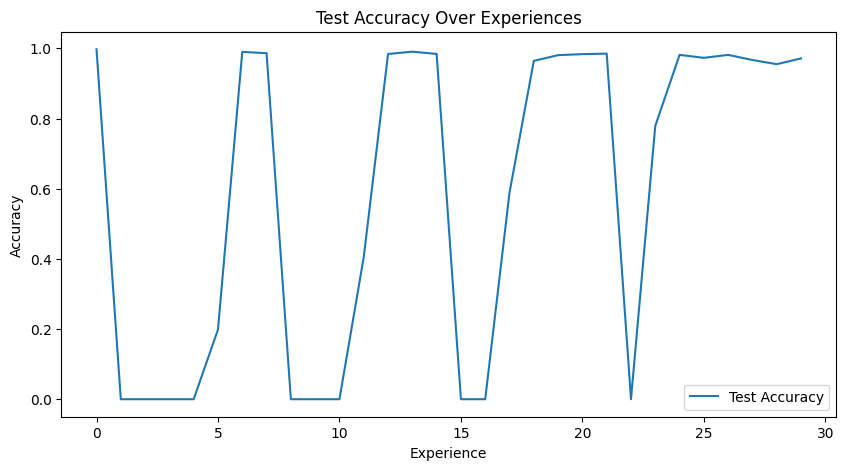

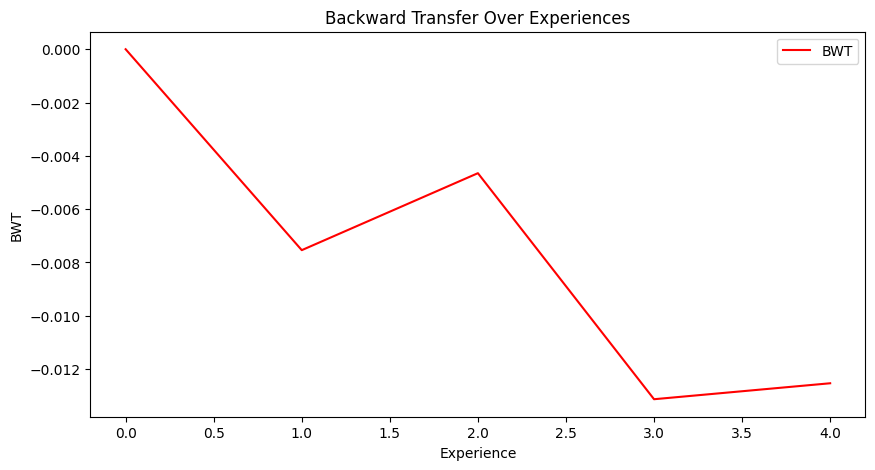

In [ ]:
benchmark = SplitMNIST(n_experiences=5, seed=42, return_task_id=False)
train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

feature_extractor = FeatureExtractor()

with torch.no_grad():
    sample_input = torch.randn(1, 1, 28, 28)
    output_size = feature_extractor(sample_input).shape[1]

class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

classifier = Classifier(input_size=output_size, num_classes=benchmark.n_classes)

model = nn.Sequential(
    feature_extractor,
    classifier
)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = ER_AML(
    model=model,
    feature_extractor=feature_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    temp=0.1,
    base_temp=0.07,
    same_task_neg=True,
    mem_size=3000,  #Tamaño de la memoria
    batch_size_mem=10,
    train_mb_size=64,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

train_accuracies = []
test_accuracies = []
bwt_values = []

for experience in benchmark.train_stream:
    print(f"Current experience: {experience.current_experience}")
    cl_strategy.train(experience)

    eval_results = cl_strategy.eval(test_stream)

    print("Available keys in eval_results:")
    for key in eval_results.keys():
        print(f"{key}: {eval_results[key]}")

    for exp_id in range(len(train_stream)):
        try:
            acc = eval_results.get(f'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_id}', None)
            if acc is not None:
                test_accuracies.append(acc)
        except KeyError:
            print(f"KeyError: 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_id}' not found")
            test_accuracies.append(None)

    try:
        overall_test_acc = eval_results['Top1_Acc_Stream/eval_phase/test_stream/Task000']
        test_accuracies.append(overall_test_acc)
    except KeyError:
        print("KeyError: 'Top1_Acc_Stream/eval_phase/test_stream/Task000' not found")

    try:
        bwt = eval_results['StreamBWT/eval_phase/test_stream']
        bwt_values.append(bwt)
    except KeyError:
        print("KeyError: 'StreamBWT/eval_phase/test_stream' not found")
        bwt_values.append(None)

#Dibujar los resultados si las métricas están disponibles
if test_accuracies:
    plt.figure(figsize=(10, 5))
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel('Experience')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy Over Experiences')
    plt.legend()
    plt.show()

if bwt_values:
    plt.figure(figsize=(10, 5))
    plt.plot(bwt_values, label="BWT", color='red')
    plt.xlabel('Experience')
    plt.ylabel('BWT')
    plt.title('Backward Transfer Over Experiences')
    plt.legend()
    plt.show()

In [ ]:
benchmark = SplitMNIST(n_experiences=5, seed=42, return_task_id=False)

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

feature_extractor = FeatureExtractor()

with torch.no_grad():
    sample_input = torch.randn(1, 1, 28, 28)
    output_size = feature_extractor(sample_input).shape[1]

class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

classifier = Classifier(input_size=output_size, num_classes=benchmark.n_classes)

model = nn.Sequential(
    feature_extractor,
    classifier
)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = ER_AML(
    model=model,
    feature_extractor=feature_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    temp=0.1,
    base_temp=0.07,
    same_task_neg=True,
    mem_size=3000,  #Tamaño de la memoria
    batch_size_mem=10,
    train_mb_size=64,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

train_accuracies = []
test_accuracies = []
forgetting_scores = []

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    print(f"Tamaño de los datos de entrenamiento: {len(experience.dataset)}")
    print(f"Tamaño del buffer de memoria: {len(cl_strategy.storage_policy.buffer)}")

    train_results = cl_strategy.train(experience)
    print("Entrenamiento completado.")

    print("Evaluando en el conjunto de prueba:")
    eval_results = cl_strategy.eval(benchmark.test_stream)

    # Imprimir todo el contenido de eval_results
    print("Contenido de eval_results:")
    for key, value in eval_results.items():
        print(f"{key}: {value}")

    print("Contenido de train_results:")
    for key, value in train_results.items():
        print(f"{key}: {value}")

Entrenando en la experiencia 0
Tamaño de los datos de entrenamiento: 11876
Tamaño del buffer de memoria: 0
-- >> Start of training phase << --
100%|██████████| 186/186 [00:09<00:00, 18.87it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9709
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:10<00:00, 17.77it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9973
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:10<00:00, 17.69it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9991
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 186/186 [00:10<00:00, 18.06it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9993
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
-- >> End of training phase << --
Entrenamiento completado.
Evaluando en el conjunto de prueba:
-- >> Start of eval phase << --
-- Starting eval 

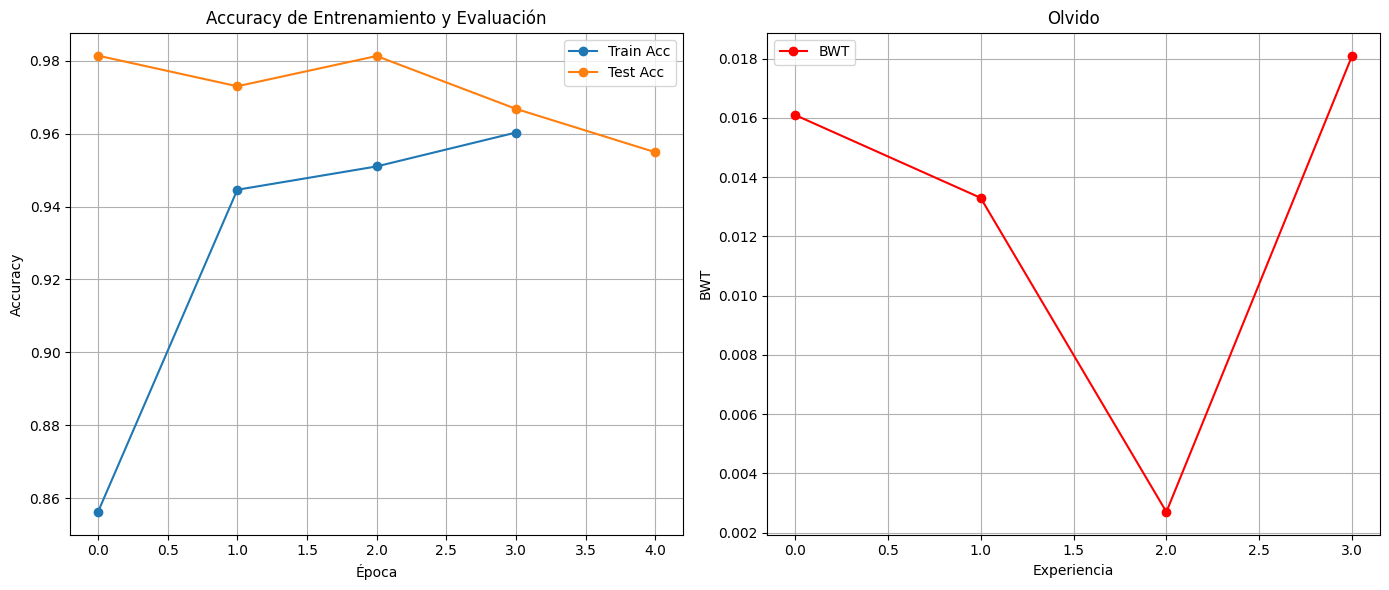

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.8562,
    0.9446,
    0.9510,
    0.9603
]

eval_accuracies = [
    0.9814,
    0.9730,
    0.9813,
    0.9668,
    0.9549
]

forgetting = [
    0.0161,
    0.0133,
    0.0027,
    0.0181,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
benchmark = SplitCIFAR10(n_experiences=5, seed=42, return_task_id=False)

#Extractor de características (CNN)
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

feature_extractor = FeatureExtractor()

#Calcular el tamaño de salida del FeatureExtractor
with torch.no_grad():
    sample_input = torch.randn(1, 3, 32, 32)
    output_size = feature_extractor(sample_input).shape[1]  #Obtener el tamaño de la salida

#La salida del extractor de características se engancha a este clasificador
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

classifier = Classifier(input_size=output_size, num_classes=benchmark.n_classes)

#Combinar el extractor de características y el clasificador en un único modelo
model = nn.Sequential(
    feature_extractor,
    classifier
)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

#strategy_plugin = ER_AML()

cl_strategy = ER_AML(
    model=model,
    feature_extractor=feature_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    temp=0.1,
    base_temp=0.07,
    same_task_neg=True,
    mem_size=3000,  #Tamaño de la memoria
    batch_size_mem=10,
    train_mb_size=64,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
    #plugins=[strategy_plugin]

)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    print(f"Tamaño de los datos de entrenamiento: {len(experience.dataset)}")
    print(f"Tamaño del buffer de memoria: {len(cl_strategy.storage_policy.buffer)}")

    cl_strategy.train(experience)
    print("Entrenamiento completado.")

    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")

Files already downloaded and verified
Files already downloaded and verified
Entrenando en la experiencia 0
Tamaño de los datos de entrenamiento: 10000
Tamaño del buffer de memoria: 0
-- >> Start of training phase << --
100%|██████████| 157/157 [00:23<00:00,  6.65it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7152
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8750
100%|██████████| 157/157 [00:23<00:00,  6.60it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8122
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
100%|██████████| 157/157 [00:22<00:00,  6.85it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8319
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
100%|██████████| 157/157 [00:23<00:00,  6.72it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8461
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
-- >> End of training phase << --
Entrenamiento completado.
Evaluando

In [ ]:
benchmark = SplitCIFAR10(n_experiences=5, seed=42, return_task_id=False)

#Extractor de características (CNN)
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

feature_extractor = FeatureExtractor()

#Calcular el tamaño de salida del FeatureExtractor
with torch.no_grad():
    sample_input = torch.randn(1, 3, 32, 32)
    output_size = feature_extractor(sample_input).shape[1]  #Obtener el tamaño de la salida

#La salida del extractor de características se engancha a este clasificador
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

classifier = Classifier(input_size=output_size, num_classes=benchmark.n_classes)

#Combinar el extractor de características y el clasificador en un único modelo
model = nn.Sequential(
    feature_extractor,
    classifier
)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)


cl_strategy = ER_AML(
    model=model,
    feature_extractor=feature_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    temp=0.1,
    base_temp=0.07,
    same_task_neg=True,
    mem_size=3000,  #Tamaño de la memoria
    batch_size_mem=10,
    train_mb_size=64,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin

)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    print(f"Tamaño de los datos de entrenamiento: {len(experience.dataset)}")
    print(f"Tamaño del buffer de memoria: {len(cl_strategy.storage_policy.buffer)}")

    cl_strategy.train(experience)
    print("Entrenamiento completado.")

    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")

Files already downloaded and verified
Files already downloaded and verified
Entrenando en la experiencia 0
Tamaño de los datos de entrenamiento: 10000
Tamaño del buffer de memoria: 0
-- >> Start of training phase << --
100%|██████████| 157/157 [00:22<00:00,  7.04it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7152
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8750
100%|██████████| 157/157 [00:23<00:00,  6.78it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8122
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
100%|██████████| 157/157 [00:21<00:00,  7.22it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8319
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
100%|██████████| 157/157 [00:22<00:00,  7.05it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8461
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
-- >> End of training phase << --
Entrenamiento completado.
Evaluando

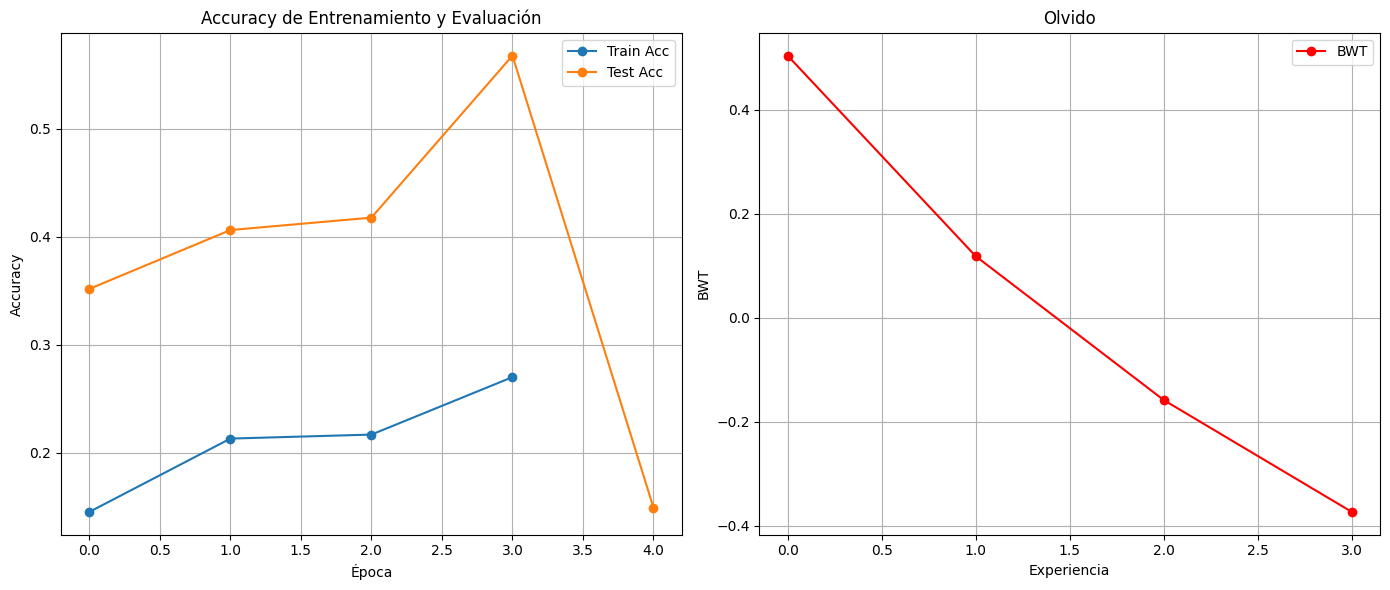

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.1450,
    0.2129,
    0.2166,
    0.2698
]

eval_accuracies = [
    0.3515,
    0.4060,
    0.4175,
    0.5675,
    0.1490
]

forgetting = [
    0.5040,
    0.1185,
    -0.1580,
    -0.3730,
]



#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
_mu = [0.485, 0.456, 0.406]  #Normalization
_std = [0.229, 0.224, 0.225]

transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=_mu,
        std=_std)
    ])

benchmark = CORe50(scenario='nc', train_transform=transform, eval_transform=transform)

Loading labels...
Loading LUP...
Loading labels names...
Files already downloaded and verified


In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

feature_extractor = FeatureExtractor()

with torch.no_grad():
    sample_input = torch.randn(1, 3, 224, 224)
    output_size = feature_extractor(sample_input).shape[1]  #Tamaño de salida

class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

classifier = Classifier(input_size=output_size, num_classes=50)  #CORE50 50 clases

model = nn.Sequential(
    feature_extractor,
    classifier
)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

interactive_logger = InteractiveLogger()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = ER_AML(
    model=model,
    feature_extractor=feature_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    temp=0.1,
    base_temp=0.07,
    same_task_neg=True,
    mem_size=3000,  #Tamaño de la memoria
    batch_size_mem=10,
    train_mb_size=512,
    train_epochs=4,
    eval_mb_size=512,
    evaluator=evaluation_plugin
)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    print(f"Tamaño de los datos de entrenamiento: {len(experience.dataset)}")
    print(f"Tamaño del buffer de memoria: {len(cl_strategy.storage_policy.buffer)}")

    cl_strategy.train(experience)
    print("Entrenamiento completado.")

    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")

Entrenando en la experiencia 0
Tamaño de los datos de entrenamiento: 23980
Tamaño del buffer de memoria: 0
-- >> Start of training phase << --
0it [00:00, ?it/s]